<a href="https://colab.research.google.com/github/Future-AI-Laboratory/deployment-testing/blob/Review/Test_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
download_link = 'https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded'

In [2]:
import os

In [3]:
command = 'wget '+ download_link
os.system(command)

0

In [4]:
source = '/content/file_downloaded'

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile(source, 'r') as zip_ref:
        zip_ref.extractall('potato')

In [1]:
import data_analysis as da

In [2]:
a = da.data_inspection('/content/potato/Plant_leave_diseases_dataset_with_augmentation', 'new14', ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight'], 'Potato')

"new14" is already present to copy the images as a whole!
All the image names in the destination folder will be 4 digit numbers!


In [3]:
a.dataset_content()

Total Disease Classifiers 39

Tomato___healthy
Potato___healthy
Pepper,_bell___Bacterial_spot
Apple___Cedar_apple_rust
Apple___Black_rot
Squash___Powdery_mildew
Grape___healthy
Peach___Bacterial_spot
Apple___healthy
Tomato___Target_Spot
Blueberry___healthy
Potato___Late_blight
Tomato___Bacterial_spot
Corn___healthy
Tomato___Early_blight
Orange___Haunglongbing_(Citrus_greening)
Soybean___healthy
Corn___Northern_Leaf_Blight
Tomato___Tomato_mosaic_virus
Corn___Common_rust
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Grape___Esca_(Black_Measles)
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Late_blight
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Background_without_leaves
Peach___healthy
Strawberry___healthy
Pepper,_bell___healthy
Raspberry___healthy
Grape___Black_rot
Cherry___healthy
Apple___Apple_scab
Corn___Cercospora_leaf_spot Gray_leaf_spot
Tomato___Septoria_leaf_spot
Strawberry___Leaf_scorch
Tomato___Leaf_Mold
Potato___Early_blight
Cherry___Powdery_mildew

The available classifiers 

In [4]:
label_df, img_df, flag = a.fetch_img_info()

POTATO directory names list ['/content/potato/Plant_leave_diseases_dataset_with_augmentation/Potato___healthy', '/content/potato/Plant_leave_diseases_dataset_with_augmentation/Potato___Late_blight', '/content/potato/Plant_leave_diseases_dataset_with_augmentation/Potato___Early_blight']

[INFO] Loading images ...
[INFO] Processing Potato___healthy
[INFO] Processing Potato___Late_blight
[INFO] Processing Potato___Early_blight
All the 3000 images for Potato are copied to image folder successfully, test passed!


In [5]:
img_df

,Image,Shape,Label
0,0.jpg,"(204, 204, 3)",Potato___healthy
1,1.jpg,"(256, 256, 3)",Potato___healthy
2,2.jpg,"(204, 204, 3)",Potato___healthy
3,3.jpg,"(204, 204, 3)",Potato___healthy
4,4.jpg,"(256, 256, 3)",Potato___healthy
...,...,...,...
2995,2995.jpg,"(256, 256, 3)",Potato___Early_blight
2996,2996.jpg,"(256, 256, 3)",Potato___Early_blight
2997,2997.jpg,"(256, 256, 3)",Potato___Early_blight
2998,2998.jpg,"(256, 256, 3)",Potato___Early_blight


In [6]:
import os

In [7]:
len(os.listdir('new14'))

3000

In [8]:
img_df

,Image,Shape,Label
0,0.jpg,"(204, 204, 3)",Potato___healthy
1,1.jpg,"(256, 256, 3)",Potato___healthy
2,2.jpg,"(204, 204, 3)",Potato___healthy
3,3.jpg,"(204, 204, 3)",Potato___healthy
4,4.jpg,"(256, 256, 3)",Potato___healthy
...,...,...,...
2995,2995.jpg,"(256, 256, 3)",Potato___Early_blight
2996,2996.jpg,"(256, 256, 3)",Potato___Early_blight
2997,2997.jpg,"(256, 256, 3)",Potato___Early_blight
2998,2998.jpg,"(256, 256, 3)",Potato___Early_blight


In [9]:
flag

True

In [10]:
label_df

,Potato___healthy,Potato___Late_blight,Potato___Early_blight
0,1000,1000,1000


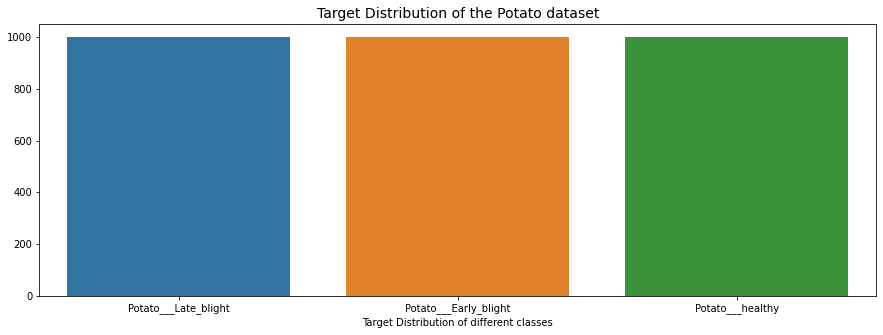

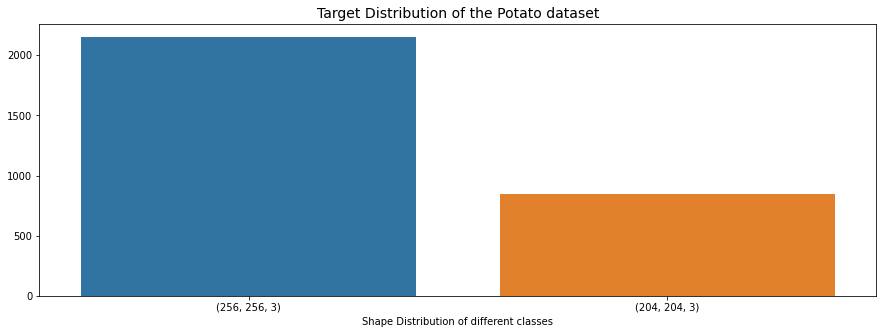

Image shape comparison between different categories 

Shape          Label                
(256, 256, 3)  Potato___Late_blight     1000
               Potato___Early_blight    1000
(204, 204, 3)  Potato___healthy          848
(256, 256, 3)  Potato___healthy          152
dtype: int64

There are imbalances in image shapes!


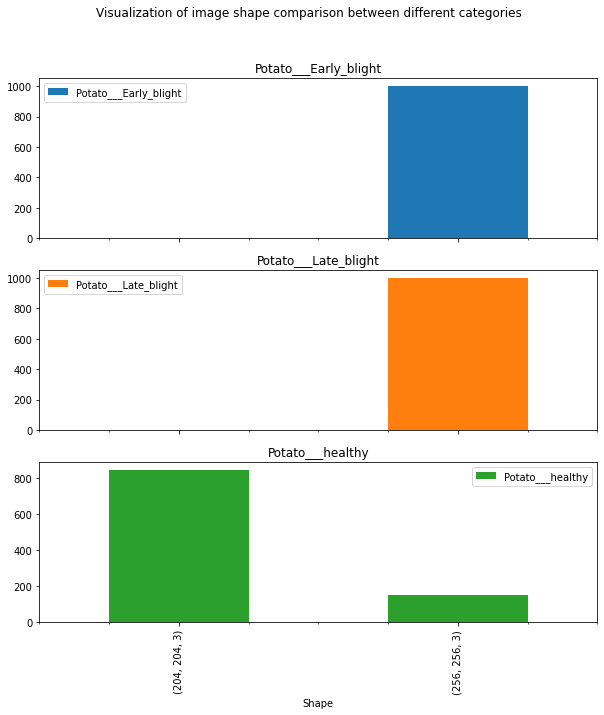

In [11]:
a.distribution_vis()

In [12]:
from keras_preprocessing.image import ImageDataGenerator as IG

In [13]:
import data_preperation as dp

In [14]:


p = dp.data_preperation(img_df, label_df, ['Image', 'Label'], classifiers=['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight'])

In [15]:
train, valid, test = p.stratified_split()

No mismatch is there in the image and label list, check passed!
1823    1823.jpg
2670    2670.jpg
2815    2815.jpg
2730    2730.jpg
2477    2477.jpg
          ...   
1297    1297.jpg
2689    2689.jpg
1916    1916.jpg
1857    1857.jpg
2834    2834.jpg
Name: Image, Length: 600, dtype: object 1823     Potato___Late_blight
2670    Potato___Early_blight
2815    Potato___Early_blight
2730    Potato___Early_blight
2477    Potato___Early_blight
                ...          
1297     Potato___Late_blight
2689    Potato___Early_blight
1916     Potato___Late_blight
1857     Potato___Late_blight
2834    Potato___Early_blight
Name: Label, Length: 600, dtype: object


In [16]:
train

,Image,Label
1578,1578.jpg,Potato___Late_blight
2961,2961.jpg,Potato___Early_blight
2389,2389.jpg,Potato___Early_blight
1131,1131.jpg,Potato___Late_blight
1029,1029.jpg,Potato___Late_blight
...,...,...
1416,1416.jpg,Potato___Late_blight
2602,2602.jpg,Potato___Early_blight
2811,2811.jpg,Potato___Early_blight
1581,1581.jpg,Potato___Late_blight


In [17]:
valid

,Image,Label
578,578.jpg,Potato___healthy
1133,1133.jpg,Potato___Late_blight
1613,1613.jpg,Potato___Late_blight
936,936.jpg,Potato___healthy
2576,2576.jpg,Potato___Early_blight
...,...,...
2016,2016.jpg,Potato___Early_blight
2499,2499.jpg,Potato___Early_blight
2710,2710.jpg,Potato___Early_blight
512,512.jpg,Potato___healthy


In [18]:
test

,Image,Label
2032,2032.jpg,Potato___Early_blight
570,570.jpg,Potato___healthy
1519,1519.jpg,Potato___Late_blight
2716,2716.jpg,Potato___Early_blight
2784,2784.jpg,Potato___Early_blight
...,...,...
2332,2332.jpg,Potato___Early_blight
1969,1969.jpg,Potato___Late_blight
2645,2645.jpg,Potato___Early_blight
273,273.jpg,Potato___healthy


Label check is done for train and test dataframe, check passed!

Train distribution
Potato___Late_blight     800
Potato___Early_blight    800
Potato___healthy         800
Name: Label, dtype: int64

Validation distribution
Potato___healthy         100
Potato___Early_blight    100
Potato___Late_blight     100
Name: Label, dtype: int64

Test distribution
Potato___healthy         100
Potato___Early_blight    100
Potato___Late_blight     100
Name: Label, dtype: int64

Stratified train-test split check is passed!



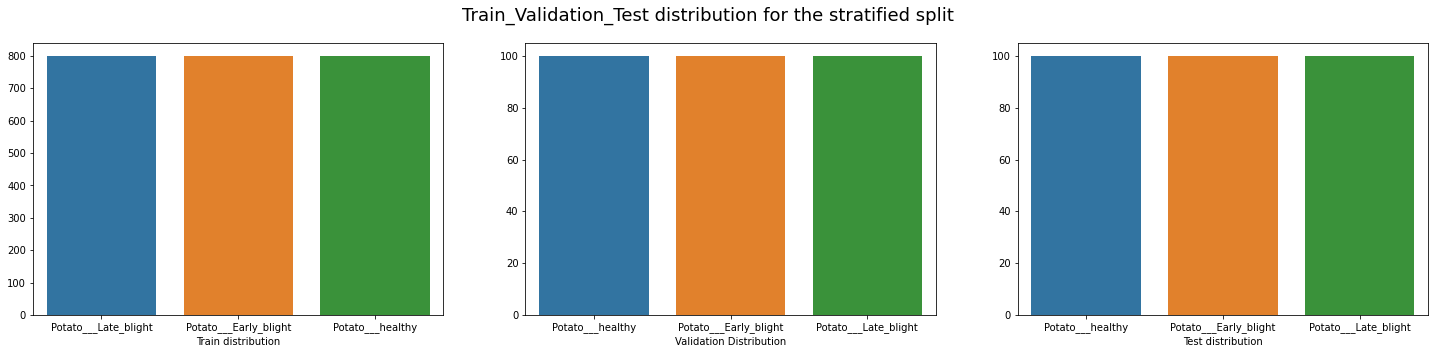

In [19]:
p.train_test_distribution_check()

In [20]:
t, v, ts = p.data_generator(img_folder='new14', class_mode='sparse', classes = {'Potato___healthy':0, 'Potato___Late_blight':1, 'Potato___Early_blight':2})

Found 2400 validated image filenames belonging to 3 classes.
Found 300 validated image filenames belonging to 3 classes.
Found 300 validated image filenames belonging to 3 classes.


In [21]:
t.classes.count(1)

800

In [22]:
t.class_indices['Potato___healthy']

2

In [23]:
p.datagen_check()


Class check is done successfully!

The final label dictionary for the disease classes are follows,
as defined by the generator will be used for the inference!
{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

Check passed, batch size 64

Check, passed data type <class 'numpy.float32'>

Check passed, class mode sparse

Check passed, target size (256, 256)


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [24]:
list(t.class_indices.keys()).count(0)

0

In [25]:
import logging